<a href="https://www.analytiksinc.com">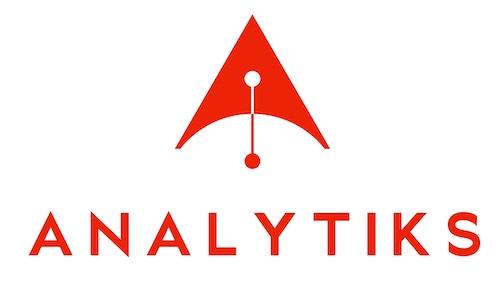</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# Cervical Cancer Risk Factors for Biopsy

<b>Dataset:</b> <i>kag_risk_factors_cervical_cancer_cleaned.csv</i> <br>

<b><a href="https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29">Description</b></a><br>
    
<b>Objectives:</b>
- Load and Explore the Dataset
- Split into Training and Test Set (see guidelines below)
- Build the following models using the Training Set (using default parameters):
    - Logistic Regression
    - KNN
    - Decision Tree
- Print the Accuracy Score of each model using the Test Set
- <i>Bonus:
    - Experiment with Decision Tree parameters to determine if you can increase the accuracy
    - Report the highest accuracy score you were able to get</i> 

<b>Guidelines:</b><br>
- Target Column: Biopsy
- Train Test Split Parameters:
    - test_size = 0.25
    - random_state = 12
- For models that have a random_state parameter:
    - random_state=12

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
#Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression

#Train-Test Split
from sklearn.model_selection import train_test_split

#Classification Metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

#Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#Import the KNN Algorithm
from sklearn.neighbors import KNeighborsClassifier

#sklearn implementation of the Naive Bayes algorithm
from sklearn.naive_bayes import GaussianNB

#Importing the Tree and Metrics Module
from sklearn.tree import DecisionTreeClassifier

#Import the Cross Validation Score function
from sklearn.model_selection import cross_val_score

In [3]:
df = pd.read_csv('../Datasets/kag_risk_factors_cervical_cancer_cleaned.csv')
df

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18.0,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15.0,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,1.0,17.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42.0,3.0,23.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.0,3.0,26.0,4.0,0.0,0.0,0.0,1.0,2.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406,28.0,4.0,18.0,4.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
407,33.0,3.0,18.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
408,25.0,6.0,17.0,2.0,0.0,0.0,0.0,1.0,2.00,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
409,33.0,3.0,19.0,3.0,0.0,0.0,0.0,1.0,0.16,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0


In [4]:
df.describe(include='all')

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.0,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,25.883212,2.155718,17.411192,2.014599,0.048662,0.351097,0.095423,0.666667,1.635693,0.029197,...,0.0,0.026764,0.014599,0.007299,0.014599,0.017032,0.060827,0.116788,0.043796,0.133820
std,7.362462,1.075258,2.745954,1.117393,0.215422,2.434709,0.852453,0.471979,2.848869,0.168564,...,0.0,0.161590,0.120085,0.085227,0.120085,0.129547,0.239304,0.321559,0.204889,0.340874
min,14.000000,1.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,25.000000,2.000000,17.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,3.000000,18.000000,3.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,52.000000,10.000000,29.000000,8.000000,1.000000,34.000000,15.000000,1.000000,20.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 411 non-null    float64
 1   Number of sexual partners           411 non-null    float64
 2   First sexual intercourse            411 non-null    float64
 3   Num of pregnancies                  411 non-null    float64
 4   Smokes                              411 non-null    float64
 5   Smokes (years)                      411 non-null    float64
 6   Smokes (packs/year)                 411 non-null    float64
 7   Hormonal Contraceptives             411 non-null    float64
 8   Hormonal Contraceptives (years)     411 non-null    float64
 9   IUD                                 411 non-null    float64
 10  IUD (years)                         411 non-null    float64
 11  STDs                                411 non-n

In [6]:
x = df.drop('Biopsy', axis=1)
y = df['Biopsy']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=12)

In [8]:
#NOTE: Only scale the predictor variables, NOT the target variable

#Instantiate the Scaler
scaler = MinMaxScaler()

#Fit to the TRAIN set
scaler.fit(x_train)

#Apply to the TRAIN set
x_train_s = scaler.transform(x_train)

#Apply to the TEST set
x_test_s = scaler.transform(x_test)

#Optional:
#Convert to DataFrame for viewing
x_train_sdf = pd.DataFrame(x_train_s, columns=x_train.columns, index=x_train.index)

#Convert to DataFrame for viewing
x_test_sdf = pd.DataFrame(x_test_s, columns=x_test.columns, index=x_test.index)

In [9]:
x_test_sdf.describe()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,...,103.0,103.0,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.304120,0.117584,0.337109,0.256068,0.048544,0.003217,0.003310,0.669903,0.076568,0.019417,...,0.0,0.0,0.038835,0.009709,0.009709,0.009709,0.009709,0.029126,0.097087,0.029126
std,0.194443,0.109824,0.160236,0.143677,0.215963,0.017563,0.021536,0.472547,0.121812,0.138662,...,0.0,0.0,0.194146,0.098533,0.098533,0.098533,0.098533,0.168983,0.297525,0.168983
min,0.027027,0.000000,0.055556,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.148649,0.000000,0.222222,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.270270,0.111111,0.333333,0.250000,0.000000,0.000000,0.000000,1.000000,0.025000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.405405,0.166667,0.388889,0.375000,0.000000,0.000000,0.000000,1.000000,0.100000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.027027,0.555556,1.000000,0.750000,1.000000,0.147059,0.200000,1.000000,0.800000,1.000000,...,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Logistic Regression

In [10]:
#Instantiate the Algorithm 
logreg = LogisticRegression(random_state=12)

#Train/Fit the model
logreg.fit(x_train_sdf, y_train)

LogisticRegression(random_state=12)

In [11]:
y_pred = logreg.predict(x_test_sdf)
y_prob = logreg.predict_proba(x_test_sdf)
df_prob = pd.DataFrame(y_prob, index=x_test_sdf.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Biopsy,pred
361,0.254514,0.745486,1.0,1.0
152,0.979905,0.020095,0.0,0.0
328,0.978149,0.021851,0.0,0.0
6,0.975064,0.024936,0.0,0.0
1,0.976987,0.023013,0.0,0.0
...,...,...,...,...
263,0.977640,0.022360,0.0,0.0
135,0.972793,0.027207,0.0,0.0
298,0.971674,0.028326,0.0,0.0
224,0.976984,0.023016,0.0,0.0


In [12]:
print("Classification report for classifier %s:\n%s\n"
      % (logreg, classification_report(y_test, y_pred)))

Classification report for classifier LogisticRegression(random_state=12):
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        89
         1.0       1.00      0.71      0.83        14

    accuracy                           0.96       103
   macro avg       0.98      0.86      0.91       103
weighted avg       0.96      0.96      0.96       103




Text(0.5, 23.5, 'Predicted label')

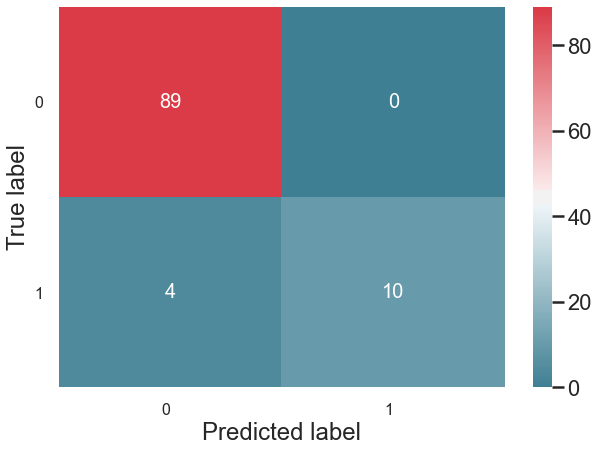

In [13]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## KNN

In [14]:
#Instatiate the model
knn = KNeighborsClassifier()

#Fit the model to the training set
knn.fit(x_train_sdf,y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(x_test_sdf)
y_prob = knn.predict_proba(x_test_sdf)
df_prob = pd.DataFrame(y_prob, index=x_test_sdf.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Biopsy,pred
361,0.2,0.8,1.0,1.0
152,1.0,0.0,0.0,0.0
328,1.0,0.0,0.0,0.0
6,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
...,...,...,...,...
263,1.0,0.0,0.0,0.0
135,1.0,0.0,0.0,0.0
298,1.0,0.0,0.0,0.0
224,1.0,0.0,0.0,0.0


In [16]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (knn, classification_report(y_test, y_pred)))

Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97        89
         1.0       1.00      0.57      0.73        14

    accuracy                           0.94       103
   macro avg       0.97      0.79      0.85       103
weighted avg       0.95      0.94      0.93       103




Text(0.5, 23.5, 'Predicted label')

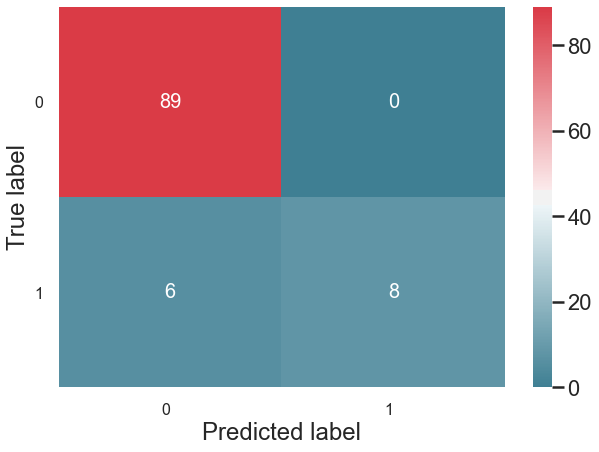

In [17]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Decision Tree

In [18]:
#Instantiate the Algorithm
clf = DecisionTreeClassifier(random_state=12, splitter='random', min_samples_split=41)

#Train the model
clf.fit(x_train_sdf,y_train)

DecisionTreeClassifier(min_samples_split=41, random_state=12, splitter='random')

In [19]:
y_pred = clf.predict(x_test_sdf)
y_prob = clf.predict_proba(x_test_sdf)
df_prob = pd.DataFrame(y_prob, index=x_test.index, columns=['prob_0', 'prob_1'])
df_prob = df_prob.join(y_test)
df_prob['pred'] = y_pred
df_prob

,prob_0,prob_1,Biopsy,pred
361,0.000000,1.000000,1.0,1.0
152,1.000000,0.000000,0.0,0.0
328,1.000000,0.000000,0.0,0.0
6,1.000000,0.000000,0.0,0.0
1,1.000000,0.000000,0.0,0.0
...,...,...,...,...
263,1.000000,0.000000,0.0,0.0
135,0.944444,0.055556,0.0,0.0
298,1.000000,0.000000,0.0,0.0
224,1.000000,0.000000,0.0,0.0


In [20]:
#Get the Confusion Matrix and other metrics to test performance
print("Classification report for classifier %s:\n%s\n"
      % (clf, classification_report(y_test, y_pred)))

Classification report for classifier DecisionTreeClassifier(min_samples_split=41, random_state=12, splitter='random'):
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98        89
         1.0       1.00      0.79      0.88        14

    accuracy                           0.97       103
   macro avg       0.98      0.89      0.93       103
weighted avg       0.97      0.97      0.97       103




Text(0.5, 23.5, 'Predicted label')

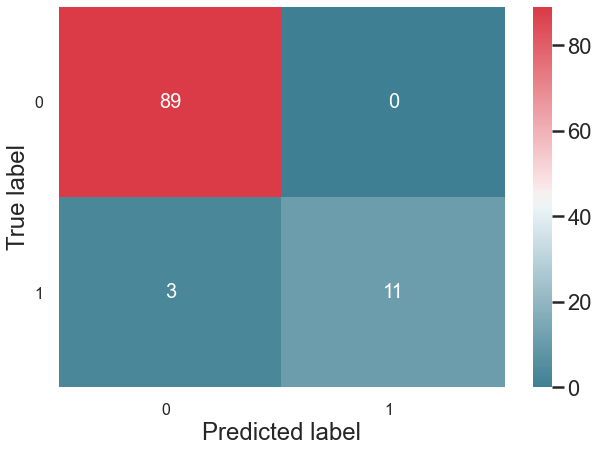

In [21]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

#Set attributes for Plot
fig = plt.figure(figsize= (10,7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Use the Seaborn Heatmap function and pass the confusion matrix dataframe
heatmap = sns.heatmap(df_cm,annot=True, annot_kws={"size": 20}, fmt="d",  cmap=cmap)

#Set attributes for the heatmap
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=16)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [22]:
#Extract the feature importance
f_importance = clf.feature_importances_

In [23]:
#Put into a DataFrame along with Feature Names for easier understanding.
f_list = x_train.columns
df_feature_importance = pd.DataFrame(f_importance, index=f_list, columns=["Importance"])

In [24]:
#Sort the values in Descending order (Most Important -> Least Important)
df_feature_importance.sort_values(["Importance"], ascending=False)

,Importance
Schiller,0.941550
Citology,0.028582
Dx,0.028370
Num of pregnancies,0.001498
STDs:HPV,0.000000
STDs:genital herpes,0.000000
STDs:molluscum contagiosum,0.000000
STDs:AIDS,0.000000
STDs:HIV,0.000000
STDs:Hepatitis B,0.000000


In [25]:
metric = 'accuracy'
samp=[]

for i in range(2,81):
    clf = DecisionTreeClassifier(random_state=12, splitter='random', min_samples_split=i)
    cv_results = cross_val_score(clf, x, y, cv=10, scoring=metric)
    samp.append([i,np.mean(cv_results)])
    
check = pd.DataFrame(samp, columns=['min_samples_split', 'accuracy score']).set_index('min_samples_split').sort_values('accuracy score', ascending=False)

In [26]:
check

,accuracy score
min_samples_split,
41,0.982927
52,0.982927
59,0.982927
58,0.982927
57,0.982927
...,...
26,0.980546
25,0.980546
24,0.980546


In [27]:
print('Highest accuracy score achieved (after cross validation): %s %%' % (check.iloc[0,0]*100))

Highest accuracy score achieved (after cross validation): 98.29268292682926 %
